# R for Data Science 실습 2 - Data wrangling and programing

## Data Wrangling (tidyr)

In [1]:
library(tidyverse)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


## Example datasets

In [2]:
table1

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [3]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [4]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [5]:
table4a # N. cases

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,745,2666
Brazil,37737,80488
China,212258,213766


In [6]:
table4b # N. population

country,1999,2000
<chr>,<dbl>,<dbl>
Afghanistan,19987071,20595360
Brazil,172006362,174504898
China,1272915272,1280428583


## pivot_longer()

One variable might be spread across multiple columns

Apply pivot_longer() to table4a

In [7]:
table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")


country,year,cases
<chr>,<chr>,<dbl>
Afghanistan,1999,745
Afghanistan,2000,2666
Brazil,1999,37737
Brazil,2000,80488
China,1999,212258
China,2000,213766


apply it to table4b

In [8]:
table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")


country,year,population
<chr>,<chr>,<dbl>
Afghanistan,1999,19987071
Afghanistan,2000,20595360
Brazil,1999,172006362
Brazil,2000,174504898
China,1999,1272915272
China,2000,1280428583


Join two tables

In [9]:
tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
left_join(tidy4a, tidy4b)


Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


### Q: What is right_join? try ?right_join and study join methods

In [10]:
tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
right_join(tidy4a, tidy4b)

Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [13]:
tidy4a <- table4a %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "cases")
tidy4b <- table4b %>%
  pivot_longer(c('1999', '2000'), names_to = "year", values_to = "population")
inner_join(tidy4a, tidy4b)

Joining with `by = join_by(country, year)`


country,year,cases,population
<chr>,<chr>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## Pivot_wider()

One observation might be scattered across multiple rows

In [14]:
table2

country,year,type,count
<chr>,<dbl>,<chr>,<dbl>
Afghanistan,1999,cases,745
Afghanistan,1999,population,19987071
Afghanistan,2000,cases,2666
Afghanistan,2000,population,20595360
Brazil,1999,cases,37737
Brazil,1999,population,172006362
Brazil,2000,cases,80488
Brazil,2000,population,174504898
China,1999,cases,212258


In [15]:
table2 %>% pivot_wider(names_from = type, values_from = count)

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


2.3.3 Exercises
1. Why are pivot_longer() and pivot_wider() not perfectly symmetrical?
Carefully consider the following example:
```
stocks <- tibble(
  year   = c(2015, 2015, 2016, 2016),
  half  = c(   1,    2,     1,    2),
  return = c(1.88, 0.59, 0.92, 0.17)
)
stocks %>%
  pivot_wider(names_from = year, values_from = return) %>%
  pivot_longer(`2015`:`2016`, names_to = "year", values_to = "return")
```
(Hint: look at the variable types and think about column names.)  
`pivot_longer()` has a `names_ptypes` argument, e.g.  `names_ptypes = list(year = double())`. What does it do?

2. Why does this code fail?
```
table4a %>%
  pivot_longer(c(1999, 2000), names_to = "year", values_to = "cases")
#> Error in `pivot_longer()`:
#> ! Can't subset columns past the end.
#> ℹ Locations 1999 and 2000 don't exist.
#> ℹ There are only 3 columns.
```

3. What would happen if you widen this table? Why? How could you add a new column to uniquely identify each value?
```
people <- tribble(
  ~name,             ~names,  ~values,
  #-----------------|--------|------
  "Phillip Woods",   "age",       45,
  "Phillip Woods",   "height",   186,
  "Phillip Woods",   "age",       50,
  "Jessica Cordero", "age",       37,
  "Jessica Cordero", "height",   156
)
```
4. Tidy the simple tibble below. Do you need to make it wider or longer? What are the variables?
```
preg <- tribble(
  ~pregnant, ~male, ~female,
  "yes",     NA,    10,
  "no",      20,    12
)
```

## Separating and Uniting

## separate()

One column contains two variables

In [16]:
table3

country,year,rate
<chr>,<dbl>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


In [17]:
table3 %>% separate(rate, into = c("cases", "population"))

country,year,cases,population
<chr>,<dbl>,<chr>,<chr>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [18]:
table3 %>% separate(rate, into = c("cases", "population")) %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [20]:
table3 %>% extract(rate, c("cases", "population"), regex = "([0-9]+)/([0-9]+)") %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


In [23]:
table3 %>% extract(rate, c("cases", "population"), regex = "(\\d+)/([0-9]+)") %>% mutate(cases = as.numeric(cases), population = as.numeric(population))

country,year,cases,population
<chr>,<dbl>,<dbl>,<dbl>
Afghanistan,1999,745,19987071
Afghanistan,2000,2666,20595360
Brazil,1999,37737,172006362
Brazil,2000,80488,174504898
China,1999,212258,1272915272
China,2000,213766,1280428583


## unite()

Single variable is spread across multiple columns

In [21]:
table5

country,century,year,rate
<chr>,<chr>,<chr>,<chr>
Afghanistan,19,99,745/19987071
Afghanistan,20,00,2666/20595360
Brazil,19,99,37737/172006362
Brazil,20,00,80488/174504898
China,19,99,212258/1272915272
China,20,00,213766/1280428583


In [22]:
table5 %>%
  unite(new, century, year, sep = "")

country,new,rate
<chr>,<chr>,<chr>
Afghanistan,1999,745/19987071
Afghanistan,2000,2666/20595360
Brazil,1999,37737/172006362
Brazil,2000,80488/174504898
China,1999,212258/1272915272
China,2000,213766/1280428583


12.4.3 Exercises
1. What do the extra and fill arguments do in separate()? Experiment with the various options for the following two toy datasets.
```
tibble(x = c("a,b,c", "d,e,f,g", "h,i,j")) %>%
  separate(x, c("one", "two", "three"))
```
```
tibble(x = c("a,b,c", "d,e", "f,g,i")) %>%
  separate(x, c("one", "two", "three"))
```
2. Both `unite()` and `separate()` have a `remove` argument. What does it do? Why would you set it to FALSE?

3. Compare and contrast `separate()` and `extract()`. Why are there three variations of separation (by position, by separator, and with groups), but only one unite?

# Functional Programming

In [24]:
df <- tibble(
  a = rnorm(10),
  b = rnorm(10),
  c = rnorm(10),
  d = rnorm(10)
)

In [25]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
1.16541443,-0.09194617,-0.866424008,1.3550426
0.96263468,0.63252506,0.202533388,1.0370376
0.31332535,-0.13800490,1.088080133,1.0494363
0.20159910,-1.26468089,0.389512973,0.4456993
1.58370744,-0.72447298,0.136746545,0.9420243
-0.47060580,0.76455879,0.515488800,-0.8426868
0.04551710,0.19706611,0.250013565,-1.9154812
-0.51938902,-0.50473022,0.007373244,-0.4033959
0.05769921,-0.19671649,0.156537886,-0.7111923


In [26]:
median(df$a)
#> [1] -0.2457625
median(df$b)
#> [1] -0.2873072
median(df$c)
#> [1] -0.05669771
median(df$d)
#> [1] 0.1442633

[1] 0.2574622

[1] -0.1673607

[1] 0.2262735

[1] 0.6938618

Don't copy and paste multiple times  
You can iterate using for loops


In [27]:
output <- vector("double", ncol(df))  # 1. output(공간 설정)
for (i in seq_along(df)) {            # 2. sequence
  output[[i]] <- median(df[[i]])      # 3. body
}
output


[1]  0.2574622 -0.1673607  0.2262735  0.6938618

In [28]:
output <- c() # 속도 느림
output


NULL

In [29]:
output <- c()
for (i in seq_along(df)) {            # 2. sequence
  output <- c( output, median(df[[i]]) )      # 3. body
}
output


[1]  0.2574622 -0.1673607  0.2262735  0.6938618

In [30]:
install.packages("rbenchmark")
library(rbenchmark)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [31]:

simple1 <- function(n) {
  output <- vector("double", n)
  for(i in 1:n)
    output[i] = i
  return(output)
}

simple2 <- function(n) {
  output <- c()
  for(i in 1:n)
    output = c(output, i)
  return(output)
}


In [32]:
simple1(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [33]:
simple2(10)

[1]  1  2  3  4  5  6  7  8  9 10

In [34]:
benchmark("fc1"=simple1(1000),
          "fc2"=simple2(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.006,100
2,fc2,0.218,100


In [35]:
226/6

[1] 37.66667

## for_loops vs functional

Possible to wrap up for loops in a function


In [36]:
col_mean <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- mean(df[[i]])
  }
  output
}

col_median <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- median(df[[i]])
  }
  output
}

col_sd <- function(df) {
  output <- vector("double", ncol(df))
  for (i in seq_along(df)) {
    output[[i]] <- sd(df[[i]])
  }
  output
}

col_mean(df)

[1]  0.3939885 -0.1533289  0.2456594  0.2545616

You can make function as a variable

In [37]:
col_summary <- function(df, fun) {
  out <- vector("double", length(df))
  for (i in seq_along(df)) {
    out[i] <- fun(df[[i]])
  }
  out
}
col_summary(df, median)


[1]  0.2574622 -0.1673607  0.2262735  0.6938618

## The map function (purrr)

the purrr package provides a family of functions for looping patterns over a vector

remind apply()

In [38]:
str(df)

tibble [10 × 4] (S3: tbl_df/tbl/data.frame)
 $ a: num [1:10] 1.165 0.963 0.313 0.202 1.584 ...
 $ b: num [1:10] -0.0919 0.6325 -0.138 -1.2647 -0.7245 ...
 $ c: num [1:10] -0.866 0.203 1.088 0.39 0.137 ...
 $ d: num [1:10] 1.355 1.037 1.049 0.446 0.942 ...


In [39]:
df

a,b,c,d
<dbl>,<dbl>,<dbl>,<dbl>
1.16541443,-0.09194617,-0.866424008,1.3550426
0.96263468,0.63252506,0.202533388,1.0370376
0.31332535,-0.13800490,1.088080133,1.0494363
0.20159910,-1.26468089,0.389512973,0.4456993
1.58370744,-0.72447298,0.136746545,0.9420243
-0.47060580,0.76455879,0.515488800,-0.8426868
0.04551710,0.19706611,0.250013565,-1.9154812
-0.51938902,-0.50473022,0.007373244,-0.4033959
0.05769921,-0.19671649,0.156537886,-0.7111923


In [40]:
df %>% map_dbl(mean)

a          b          c          d 
 0.3939885 -0.1533289  0.2456594  0.2545616

In [41]:
df %>% map(mean)

$a
[1] 0.3939885

$b
[1] -0.1533289

$c
[1] 0.2456594

$d
[1] 0.2545616

In [42]:
df %>% map_dbl(median)

a          b          c          d 
 0.2574622 -0.1673607  0.2262735  0.6938618

In [43]:
mtcars

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2
Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2


In [44]:
mtcars %>%
  split(.$cyl)

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
Merc 240D,24.4,4,146.7,62,3.69,3.190,20.00,1,0,4,2
Merc 230,22.8,4,140.8,95,3.92,3.150,22.90,1,0,4,2
Fiat 128,32.4,4,78.7,66,4.08,2.200,19.47,1,1,4,1
Honda Civic,30.4,4,75.7,52,4.93,1.615,18.52,1,1,4,2
Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.90,1,1,4,1
Toyota Corona,21.5,4,120.1,97,3.70,2.465,20.01,1,0,3,1
Fiat X1-9,27.3,4,79.0,66,4.08,1.935,18.90,1,1,4,1
Porsche 914-2,26.0,4,120.3,91,4.43,2.140,16.70,0,1,5,2


You can define a function in map

In [45]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}

mtcars %>%
  split(.$cyl) %>%
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [46]:
mtcars %>%
  split(.$cyl) %>%
  map(function(df) lm(mpg ~ wt, data = df))


$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [ ]:
f1 <- function(df) {
  lm(mpg ~ wt, data = df)
}
mtcars %>%
  split(.$cyl) %>%
  map(f1)

$`4`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = df)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [47]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .))


$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     39.571       -5.647  


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
      28.41        -2.78  


$`8`

Call:
lm(formula = mpg ~ wt, data = .)

Coefficients:
(Intercept)           wt  
     23.868       -2.192  



In [48]:
df %>% map_dbl(mean)

a          b          c          d 
 0.3939885 -0.1533289  0.2456594  0.2545616

In [49]:
df %>% map_dbl(~mean(.))

a          b          c          d 
 0.3939885 -0.1533289  0.2456594  0.2545616

## Extract Component

In [50]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary)

$`4`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.1513 -1.9795 -0.6272  1.9299  5.2523 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   39.571      4.347   9.104 7.77e-06 ***
wt            -5.647      1.850  -3.052   0.0137 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 3.332 on 9 degrees of freedom
Multiple R-squared:  0.5086,	Adjusted R-squared:  0.454 
F-statistic: 9.316 on 1 and 9 DF,  p-value: 0.01374


$`6`

Call:
lm(formula = mpg ~ wt, data = .)

Residuals:
     Mazda RX4  Mazda RX4 Wag Hornet 4 Drive        Valiant       Merc 280 
       -0.1250         0.5840         1.9292        -0.6897         0.3547 
     Merc 280C   Ferrari Dino 
       -1.0453        -1.0080 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)   
(Intercept)   28.409      4.184   6.789  0.00105 **
wt            -2.780      1.335  -2.083  0.09176 . 
---
Signif.

In [51]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl(~.$r.squared)


4         6         8 
0.5086326 0.4645102 0.4229655

In [52]:
mtcars %>%
  split(.$cyl) %>%
  map(~lm(mpg ~ wt, data = .)) %>%
  map(summary) %>%
  map_dbl('r.squared')


4         6         8 
0.5086326 0.4645102 0.4229655

You can also use an integer to select elements by position

In [53]:
x <- list(list(1, 2, 3), list(4, 5, 6), list(7, 8, 9))
x %>% map_dbl(2)
#> [1] 2 5 8


[1] 2 5 8

In [54]:
x

[[1]]
[[1]][[1]]
[1] 1

[[1]][[2]]
[1] 2

[[1]][[3]]
[1] 3


[[2]]
[[2]][[1]]
[1] 4

[[2]][[2]]
[1] 5

[[2]][[3]]
[1] 6


[[3]]
[[3]][[1]]
[1] 7

[[3]][[2]]
[1] 8

[[3]][[3]]
[1] 9

Functional Programming is memory efficient by not saving internal calculations. Easier to understand if you get used to it.

Is it fater as well?

In [55]:
n_len = 10

In [56]:
rep(10,n_len)

[1] 10 10 10 10 10 10 10 10 10 10

In [57]:
rep(10,n_len) %>% map(rnorm)

[[1]]
 [1] -0.289288845  1.157024889  0.087837424  1.225570587  1.157481041
 [6]  0.940094967  0.051689105 -1.359373697 -0.008468298  0.255128362

[[2]]
 [1] -1.0586540 -1.0634570  1.0715356  0.2142859  0.2446710  0.7953696
 [7] -0.5315621  0.9208892 -2.2110062 -0.2484067

[[3]]
 [1]  0.2422549 -1.2773468  1.1996171  0.1375904 -0.7329216 -2.0243079
 [7]  1.1389553  0.8320424 -0.1775515  1.7098285

[[4]]
 [1]  0.8361793  0.9830623 -0.3858357  1.1126627  1.0977104 -0.1078957
 [7] -0.2663694  0.5398391  0.8622040  0.2880684

[[5]]
 [1]  1.57307497  0.96648187  0.08451354 -0.38796689  0.55447516  0.63511893
 [7] -0.94441155 -0.88026584 -0.15457910 -1.28028250

[[6]]
 [1] -0.94033479  1.94635688 -0.21179374  1.11091718  2.01659120  2.16719681
 [7]  2.20440704  0.85896512 -0.03937927 -1.43150197

[[7]]
 [1]  0.1814172 -1.6428309 -2.0584138 -1.1448350 -0.5617650  2.1741344
 [7]  1.9529932  1.2624002 -0.4326807 -0.1798462

[[8]]
 [1]  0.4946174 -2.0270900  1.2406593 -0.5446188  0.2944267  1.2148155
 [7]  0.2790918  0.2870731 -1.7645416 -0.3066651

[[9]]
 [1] -0.2597898  0.9266367  0.4123152 -1.3156887  1.5956936 -0.3474527
 [7]  1.2152767 -0.2023033  0.6809212 -0.8095573

[[10]]
 [1]  0.1558268 -1.0768904  0.3378626  0.9995309  0.1871894 -0.7476902
 [7] -0.6912485  0.4624107  0.3550952 -0.8719886

In [58]:
df2 <- vector(mode = "list", length = n_len)
for (i in 1:n_len)
  df2[[i]] <- rnorm(10)
df2

[[1]]
 [1]  0.7441640 -0.3356262 -1.8871175 -1.1239072  0.3969486  1.8651480
 [7] -1.7678720 -0.8280183 -1.8328507  0.5083246

[[2]]
 [1] -0.5635388  1.3205740  0.2651484  0.2608166 -0.6391838 -0.6005816
 [7] -0.4683484 -0.3077797 -1.8302229 -0.5140039

[[3]]
 [1]  1.9717324  2.2991685  0.5731048 -0.9089743 -1.1105761 -0.1526107
 [7] -0.0270600  0.7048052  0.6817003 -1.3097074

[[4]]
 [1] -1.2651823  1.1616830  0.1257738 -0.4098971 -0.2193009  0.9592802
 [7] -0.8847022 -2.1947573  0.4046777 -0.1528965

[[5]]
 [1] -0.88082062  1.36897251  0.99484928  0.31707262  1.46205673  0.06293598
 [7] -0.97236358  2.93310707  0.48235122 -0.05681616

[[6]]
 [1]  1.65283324  0.71996692  0.25259106 -1.53013763 -0.66137973 -0.78445072
 [7]  0.05652298 -0.56838672  0.75903522 -0.15933395

[[7]]
 [1] -0.4810133 -1.6097721 -0.5915550  0.7611477  0.5716761  0.9780213
 [7] -0.4779595  0.7288058  0.6702790  1.3935512

[[8]]
 [1]  0.37935256 -0.51275802  0.05240193  1.54157689  1.34263459 -0.47273613
 [7] -0.72475557 -0.18333592  1.45304586  0.38007700

[[9]]
 [1]  1.45350531  0.68579536 -0.09216045 -0.40635616  0.76887338 -0.57165704
 [7]  0.09255910  0.55382929 -1.07886323 -0.02878218

[[10]]
 [1]  1.2063854 -2.0105078 -0.1728714 -0.8378498  1.1444637 -2.1063185
 [7] -0.8951502 -1.2739316  0.7054698 -1.2531214

In [59]:
lapply(rep(10,n_len), rnorm )

[[1]]
 [1] -0.6892834 -0.2938620  1.3164168 -0.7703418 -1.0083718  0.5331300
 [7]  0.8079878 -0.8696397 -0.8960307 -1.3499207

[[2]]
 [1] -0.4345613  1.6511693 -1.5546167 -1.9627893  0.7246021 -0.2000834
 [7]  0.1288002  0.5195779  0.2546380  0.4088456

[[3]]
 [1] -1.2140468  0.5930853  1.9161664  1.1248670 -0.2323610 -1.6581468
 [7]  0.7421168  0.2714819 -1.3873958  0.5512663

[[4]]
 [1]  0.89645098  1.31473169  1.01962372 -0.14620231 -0.51548361  0.79454444
 [7]  0.07702519 -0.01697511 -0.27378334 -1.18361641

[[5]]
 [1]  0.5623971  0.3991552  1.1912125  0.4442275 -0.6861736 -1.2907869
 [7]  0.3354111  2.7602501 -0.9297030 -1.1769653

[[6]]
 [1]  1.42273243 -2.06539407  1.42183300  1.19706636 -0.42388186 -0.04464940
 [7]  2.46805228  0.06261994  0.79571517 -1.21999946

[[7]]
 [1] -0.32341290 -1.56531812 -0.55392883  1.69084467  0.19421478 -1.49484985
 [7]  1.06401486 -0.16448217  0.07127508  1.03635558

[[8]]
 [1] -0.35768053 -0.67131036 -0.12484753 -1.27481706  0.76702539  1.46216229
 [7]  0.08657948  0.10985435  0.63847365  0.05062263

[[9]]
 [1]  1.68715164  0.11621683  1.65714943 -0.02314304 -1.10070896  0.17568609
 [7]  0.16966228 -0.52153879 -0.46001008  0.41919004

[[10]]
 [1]  1.54381562 -1.14144714  0.02557959 -0.03875084  0.67985834 -1.37778468
 [7] -0.34938516  0.29366021  1.56211547  0.93970217

In [60]:
gen1 <- function(n_len) {
  rep(10,n_len) %>% map(rnorm)
}

In [61]:
gen2 <- function(n_len) {
  df2 <- vector(mode = "list", length = n_len)
  for (i in 1:n_len)
    df2[[i]] <- rnorm(10)
  df2
}

In [62]:
gen3 <- function(n_len) {
  lapply(rep(10,n_len), rnorm )
}

In [63]:
gen2(10)

[[1]]
 [1]  0.4456018 -0.3130910 -0.2344424  0.4347147  0.6471489  1.0301354
 [7]  0.4883484  1.5684575  0.8921891  1.5141316

[[2]]
 [1] -0.04546806  0.56669352  1.00685086  0.74938384 -0.66518499 -0.45788670
 [7] -0.65080161 -1.55589836 -0.75302220  1.10571981

[[3]]
 [1]  1.2992967  0.3931489  0.5851268 -0.3242878  0.8729185 -0.9986853
 [7]  1.3590565  0.3107248 -0.3695355 -1.0808854

[[4]]
 [1] -0.7447705 -0.1386291  0.5021560 -0.4552998 -0.5071136 -1.2692301
 [7] -0.5537867  2.2645867 -1.7740595  0.5411878

[[5]]
 [1] -1.8436897  0.2797497  1.4195933 -0.6078894 -1.2112439 -1.1453064
 [7] -0.4591756  1.2776126 -2.2744353 -0.3521133

[[6]]
 [1] -1.80654678  0.26052594 -0.02165521  0.35592796  0.42935325  0.65179920
 [7]  0.87125507 -0.40143439 -0.80678981  1.34349987

[[7]]
 [1]  0.48377081  1.51400444  0.30249021  1.15563397  0.08810434  1.71185212
 [7] -1.76813738  0.75212510 -1.02581971  1.29295063

[[8]]
 [1] -1.53524566 -0.06055823 -0.87480837 -0.68242471  1.30795089 -0.79174221
 [7]  0.76750022 -0.75229606  1.11738545  0.62349138

[[9]]
 [1] -0.96382205  0.01488528 -0.15340034 -0.67580802 -1.35135048 -1.07137994
 [7]  0.91075433  0.90789746 -2.03327585 -0.81632822

[[10]]
 [1] -0.318227419 -0.646351039 -1.454337432 -0.376827676 -0.893264919
 [6]  0.934899512 -0.003771857 -0.931815247  0.069617263  0.830364129

In [64]:
benchmark("fc1"=gen1(1000),
          "fc2"=gen2(1000),
          "fc3"=gen3(1000),
          replications=100,
          columns=c('test', 'elapsed', 'replications'))

,test,elapsed,replications
,<chr>,<dbl>,<int>
1,fc1,0.233,100
2,fc2,0.198,100
3,fc3,0.405,100


# Something useful

In [65]:
diamonds

carat,cut,color,clarity,depth,table,price,x,y,z
<dbl>,<ord>,<ord>,<ord>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>
0.23,Ideal,E,SI2,61.5,55,326,3.95,3.98,2.43
0.21,Premium,E,SI1,59.8,61,326,3.89,3.84,2.31
0.23,Good,E,VS1,56.9,65,327,4.05,4.07,2.31
0.29,Premium,I,VS2,62.4,58,334,4.20,4.23,2.63
0.31,Good,J,SI2,63.3,58,335,4.34,4.35,2.75
0.24,Very Good,J,VVS2,62.8,57,336,3.94,3.96,2.48
0.24,Very Good,I,VVS1,62.3,57,336,3.95,3.98,2.47
0.26,Very Good,H,SI1,61.9,55,337,4.07,4.11,2.53
0.22,Fair,E,VS2,65.1,61,337,3.87,3.78,2.49


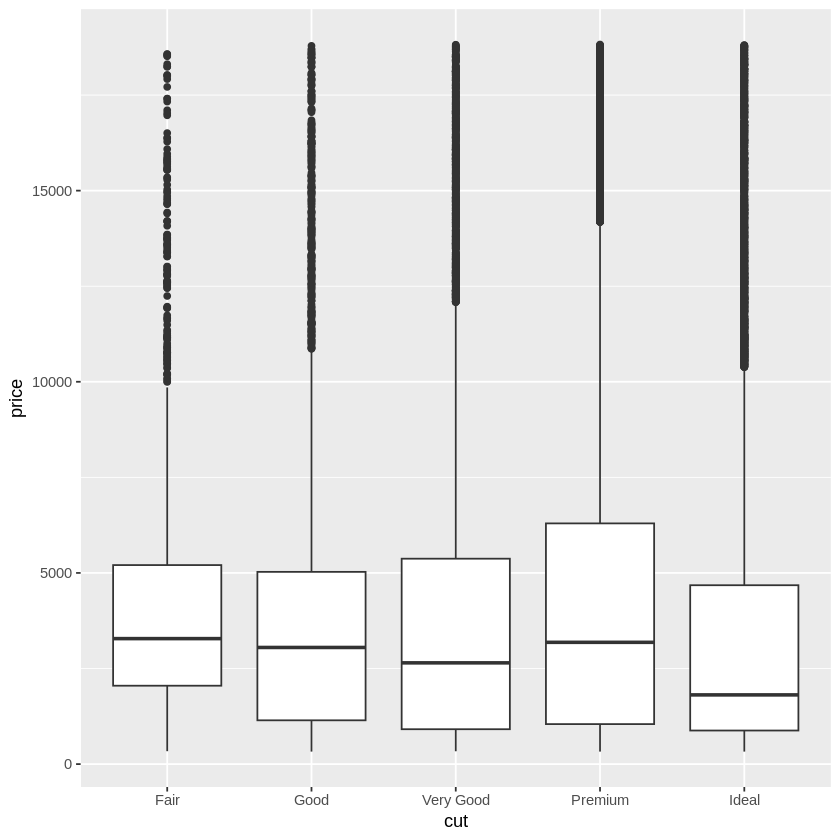

In [66]:
diamonds %>% ggplot(aes(cut, price)) + geom_boxplot()

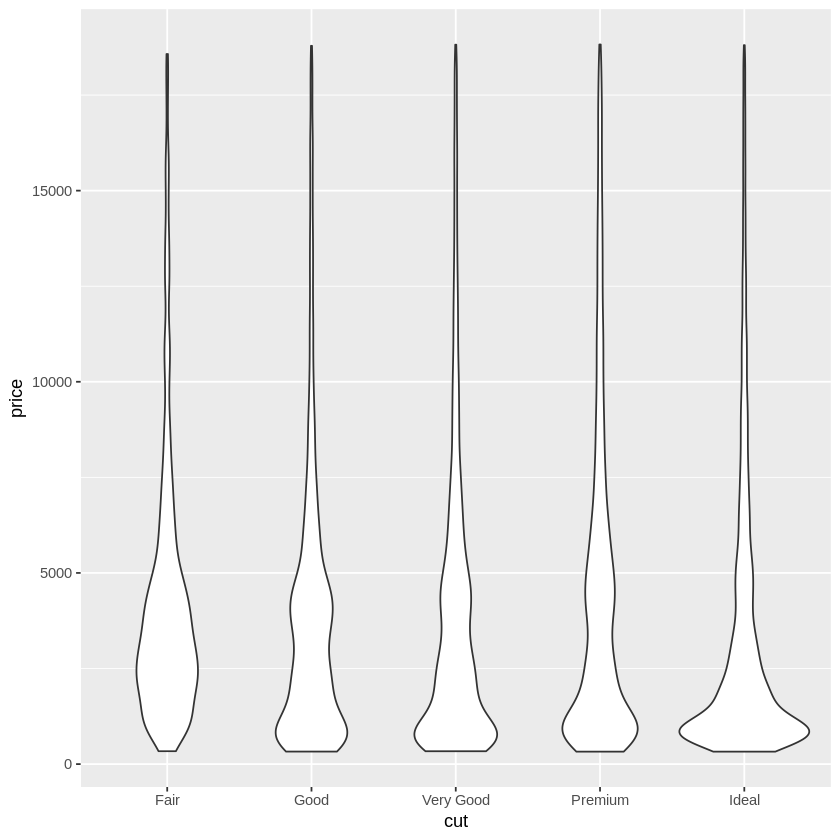

In [67]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin()

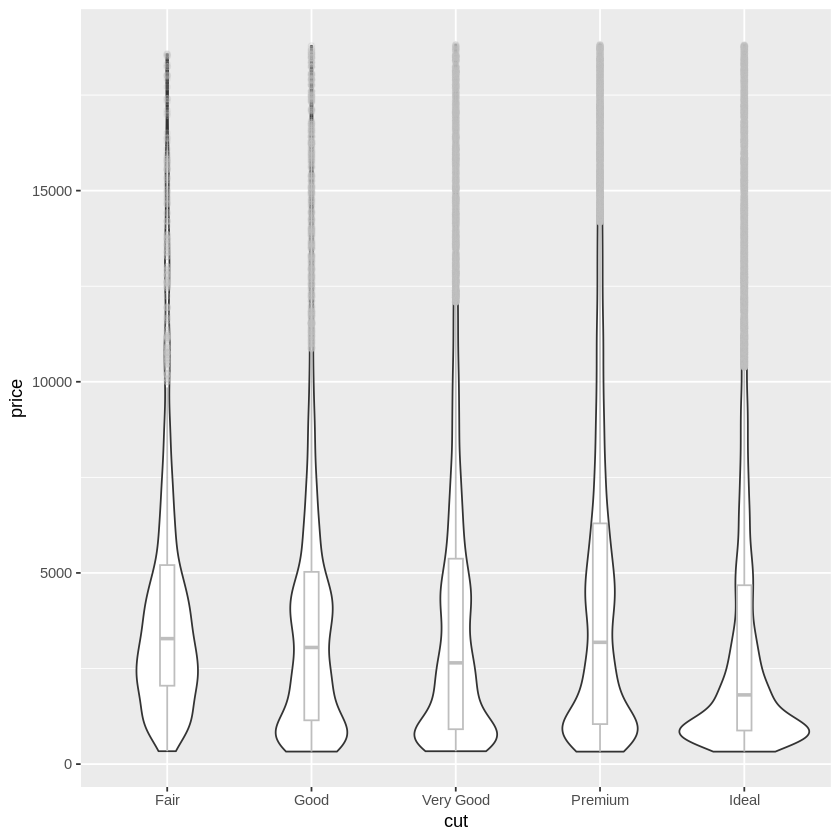

In [68]:
diamonds %>% ggplot(aes(cut, price)) + geom_violin() + geom_boxplot(width=0.1, color="grey", alpha=0.2)